Car Price Prediction Dataset

In [1]:
import pandas as pd                        
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
data.shape

(205, 26)

In [6]:
data.size

5330

In [7]:
pd.DataFrame(data.dtypes, columns=["dataTypes"])

,dataTypes
car_ID,int64
symboling,int64
CarName,object
fueltype,object
aspiration,object
doornumber,object
carbody,object
drivewheel,object
enginelocation,object
wheelbase,float64


In [8]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
data.car_ID.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [12]:
data_clean = data.drop("car_ID", axis= 1)

In [13]:
data_clean.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
data.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [15]:
data_clean["comapny_name"] = data["CarName"].apply(lambda x: x.split()[0])

In [16]:
data_clean.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,comapny_name
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [17]:
data_clean["comapny_name"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
data_clean["comapny_name"].replace("toyouta", "toyota", inplace= True)
data_clean["comapny_name"].replace("vokswagen", "volkswagen", inplace= True)
data_clean["comapny_name"].replace("vw", "volkswagen", inplace= True)
data_clean["comapny_name"].replace("Nissan", "nissan", inplace= True)
data_clean["comapny_name"].replace("maxda", "mazda", inplace= True)
data_clean["comapny_name"].replace("porcshce", "porsche", inplace= True)

C:\Users\harme\AppData\Local\Temp\ipykernel_25960\682827544.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_clean["comapny_name"].replace("toyouta", "toyota", inplace= True)
C:\Users\harme\AppData\Local\Temp\ipykernel_25960\682827544.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [19]:
data_clean["comapny_name"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [20]:
data_clean["comapny_name"].nunique()

22

In [21]:
data_clean.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,comapny_name
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [22]:
data_clean = data_clean.drop("CarName", axis = 1)

In [23]:
data_clean["symboling"].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [24]:
data_clean["fueltype"].unique()


array(['gas', 'diesel'], dtype=object)

In [37]:
data_clean["aspiration"].unique()

array(['std', 'turbo'], dtype=object)

In [38]:
data_clean["doornumber"].unique()

array(['two', 'four'], dtype=object)

In [39]:
data_clean["carbody"].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [40]:
data_clean["drivewheel"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [41]:
data_clean["enginelocation"].unique()

array(['front', 'rear'], dtype=object)

In [42]:
data_clean["fuelsystem"].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
data_clean.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,comapny_name
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [43]:
Transform = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation','fuelsystem']
le = LabelEncoder()

for i in Transform:
    data_clean[i] = le.fit_transform(data_clean[i])

In [44]:
data_clean.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,comapny_name
0,3,1,0,two,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,1,0,two,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,1,0,two,2,2,0,94.5,171.2,65.5,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,1,0,four,3,1,0,99.8,176.6,66.2,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,0,four,3,0,0,99.4,176.6,66.4,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [49]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int32  
 2   aspiration        205 non-null    int32  
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    int32  
 5   drivewheel        205 non-null    int32  
 6   enginelocation    205 non-null    int32  
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    int32  
 16  boreratio         205 non-null    float64
 1

In [46]:
data_clean.doornumber.unique()

array(['two', 'four'], dtype=object)

In [47]:
data_clean["doornumber"].replace("two", 2, inplace= True)
data_clean["doornumber"].replace("four", 4, inplace= True)

C:\Users\harme\AppData\Local\Temp\ipykernel_24264\5503339.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_clean["doornumber"].replace("four", 4, inplace= True)


In [48]:
data_clean.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,comapny_name
0,3,1,0,2,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,1,0,2,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,1,0,2,2,2,0,94.5,171.2,65.5,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,1,0,4,3,1,0,99.8,176.6,66.2,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,0,4,3,0,0,99.4,176.6,66.4,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [50]:
data_clean["enginetype"].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [51]:
data_clean["enginesize"].unique()

array([130, 152, 109, 136, 131, 108, 164, 209,  61,  90,  98, 122, 156,
        92,  79, 110, 111, 119, 258, 326,  91,  70,  80, 140, 134, 183,
       234, 308, 304,  97, 103, 120, 181, 151, 194, 203, 132, 121, 146,
       171, 161, 141, 173, 145], dtype=int64)

In [52]:
data_clean["enginetype"] = le.fit_transform(data_clean["enginetype"])

In [54]:
data_clean["enginesize"] = data_clean["enginesize"].astype(int)

In [55]:
data_clean.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,comapny_name
0,3,1,0,2,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,1,0,2,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,1,0,2,2,2,0,94.5,171.2,65.5,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,1,0,4,3,1,0,99.8,176.6,66.2,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,0,4,3,0,0,99.4,176.6,66.4,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [60]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int32  
 2   aspiration        205 non-null    int32  
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    int32  
 5   drivewheel        205 non-null    int32  
 6   enginelocation    205 non-null    int32  
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    int32  
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int32  
 15  fuelsystem        205 non-null    int32  
 16  boreratio         205 non-null    float64
 1

In [64]:
data_clean["cylindernumber"].replace("twelve", 12, inplace= True)
data_clean["cylindernumber"].unique()


C:\Users\harme\AppData\Local\Temp\ipykernel_24264\1161154943.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_clean["cylindernumber"].replace("twelve", 12, inplace= True)
C:\Users\harme\AppData\Local\Temp\ipykernel_24264\1161154943.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_cle

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [69]:
data_clean["company_name"] = le.fit_transform(data_clean["comapny_name"])

In [71]:
data_clean = data_clean.drop("comapny_name", axis = 1)

In [72]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int32  
 2   aspiration        205 non-null    int32  
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    int32  
 5   drivewheel        205 non-null    int32  
 6   enginelocation    205 non-null    int32  
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    int32  
 13  cylindernumber    205 non-null    int64  
 14  enginesize        205 non-null    int32  
 15  fuelsystem        205 non-null    int32  
 16  boreratio         205 non-null    float64
 1

In [86]:
data_clean.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
0,3,1,0,2,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,0
1,3,1,0,2,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,0
2,1,1,0,2,2,2,0,94.5,171.2,65.5,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,0
3,2,1,0,4,3,1,0,99.8,176.6,66.2,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,2,1,0,4,3,0,0,99.4,176.6,66.4,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,1


In [87]:
x = data_clean.iloc[:,data_clean.columns != "price"]

In [88]:
x.shape

(205, 24)

In [89]:
y = data_clean.loc[:,data_clean.columns == "price"]

In [90]:
y.shape

(205, 1)

In [91]:
y.head()

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


In [85]:
from sklearn.model_selection import train_test_split

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.30, random_state= 41)

In [93]:
x_train.shape

(143, 24)

In [94]:
x_test.shape

(62, 24)

In [95]:
y_train.shape

(143, 1)

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:

lr = LinearRegression()

In [96]:
lr.fit(x_train,y_train)

LinearRegression()

In [97]:
pred_values = lr.predict(x_test)

In [105]:
round_pred_values = pred_values.round(3)

In [106]:
round_pred_values[:10]

array([[ 5820.633],
       [14339.602],
       [13715.919],
       [20387.169],
       [27581.812],
       [18633.518],
       [ 2944.216],
       [ 6287.19 ],
       [ 7298.093],
       [ 8811.528]])

In [107]:
y_test.head(10)

,price
96,7499.000
63,10795.000
171,11549.000
201,19045.000
68,28248.000
9,17859.167
154,7898.000
91,6649.000
51,6095.000
165,9298.000


In [104]:
from sklearn.metrics import mean_squared_error

In [111]:
diff = mean_squared_error(round_pred_values,y_test)

In [112]:
diff.round(2)

8828672.95

In [116]:
from sklearn.tree import DecisionTreeRegressor


In [117]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

importances = model.feature_importances_
print('Feature Importances:', importances)


Feature Importances: [7.68836756e-04 0.00000000e+00 0.00000000e+00 3.84520494e-04
 2.56012110e-03 8.65240592e-04 0.00000000e+00 2.12598329e-04
 2.59118077e-04 1.21271522e-02 1.31014438e-03 2.21464439e-01
 0.00000000e+00 1.81091419e-04 7.09756634e-01 5.06494889e-07
 1.68052784e-05 3.12114251e-03 6.85533507e-03 1.40023668e-02
 2.19132436e-05 1.73507781e-02 2.05799070e-03 6.68326605e-03]


In [119]:
# Assuming data_clean is your DataFrame
feature_names = x_train.columns.tolist()
print(feature_names)



['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'company_name']


In [130]:
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort and display feature importances
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

             Feature    Importance
14        enginesize  7.097566e-01
11        curbweight  2.214644e-01
21           citympg  1.735078e-02
19        horsepower  1.400237e-02
9           carwidth  1.212715e-02
18  compressionratio  6.855335e-03
23      company_name  6.683266e-03
17            stroke  3.121143e-03
4            carbody  2.560121e-03
22        highwaympg  2.057991e-03
10         carheight  1.310144e-03
5         drivewheel  8.652406e-04
0          symboling  7.688368e-04
3         doornumber  3.845205e-04
8          carlength  2.591181e-04
7          wheelbase  2.125983e-04
13    cylindernumber  1.810914e-04
20           peakrpm  2.191324e-05
16         boreratio  1.680528e-05
15        fuelsystem  5.064949e-07
1           fueltype  0.000000e+00
6     enginelocation  0.000000e+00
2         aspiration  0.000000e+00
12        enginetype  0.000000e+00


<Axes: >

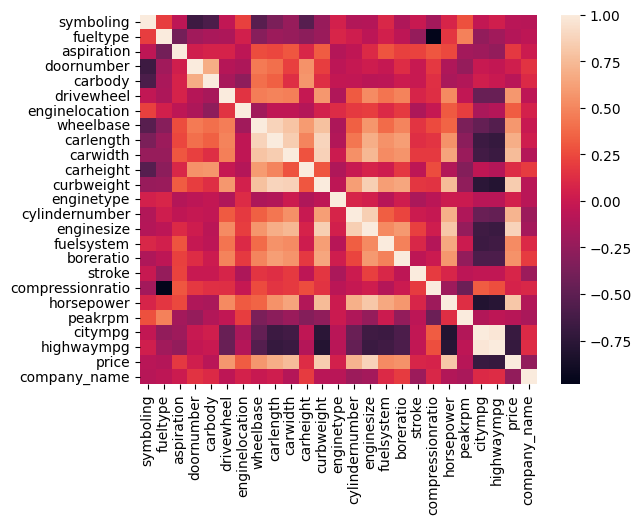

In [79]:
sns.heatmap(data_clean.corr())

In [148]:
data_clean.corr()["price"].sort_values(ascending= False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
cylindernumber      0.718305
carlength           0.682920
drivewheel          0.577992
wheelbase           0.577816
boreratio           0.553173
fuelsystem          0.526823
enginelocation      0.324973
aspiration          0.177926
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
enginetype          0.049171
doornumber          0.031835
symboling          -0.079978
carbody            -0.083976
peakrpm            -0.085267
fueltype           -0.105679
company_name       -0.262234
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

In [146]:
importance_df

,Feature,Importance
14,enginesize,7.097566e-01
11,curbweight,2.214644e-01
21,citympg,1.735078e-02
19,horsepower,1.400237e-02
9,carwidth,1.212715e-02
18,compressionratio,6.855335e-03
23,company_name,6.683266e-03
17,stroke,3.121143e-03
4,carbody,2.560121e-03
22,highwaympg,2.057991e-03


In [ ]:
drop_columns = ['fueltype','aspiration','enginelocation','fueltype']

In [149]:
DecisionTreeRegressor_clean_data = data_clean

In [150]:
DecisionTreeRegressor_clean_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
0,3,1,0,2,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,0
1,3,1,0,2,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,0
2,1,1,0,2,2,2,0,94.5,171.2,65.5,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,0
3,2,1,0,4,3,1,0,99.8,176.6,66.2,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,2,1,0,4,3,0,0,99.4,176.6,66.4,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,1


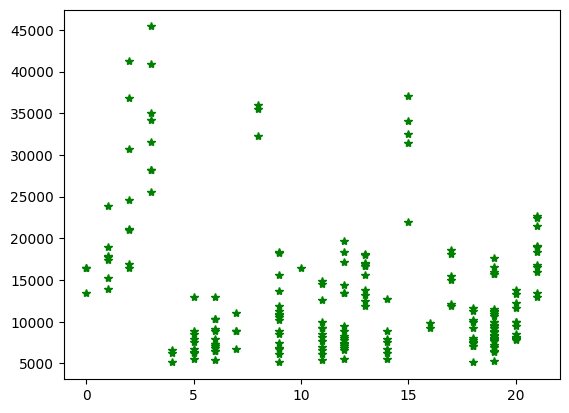

In [115]:
plt.plot(data_clean["company_name"],data_clean["price"], "*",color = "green")

In [43]:
columns_drop = ['highwaympg', 'citympg', 'company_name', 'fueltype', 'peakrpm']

In [44]:
data = data.drop("car_ID", axis= 1)

In [45]:
data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [46]:
data.aspiration.value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

In [47]:
data.loc[data["aspiration"] == "std", "aspiration"] = 1

In [48]:
data.loc[data["aspiration"] == "turbo", "aspiration"] = 2

In [49]:
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,1,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,1,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,1,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,1,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,1,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [50]:
data.aspiration.value_counts()

aspiration
1    168
2     37
Name: count, dtype: int64

In [52]:
data.fueltype.value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

In [55]:
data["fueltype"] = pd.factorize(data["fueltype"])[0]

In [56]:
data.fueltype.value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      0
2      0
3      0
4      0
      ..
200    0
201    0
202    0
203    1
204    0
Name: fueltype, Length: 205, dtype: int64>

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int64  
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [58]:
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,1,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,1,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,1,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,0,1,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,0,1,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [59]:
data.doornumber.value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

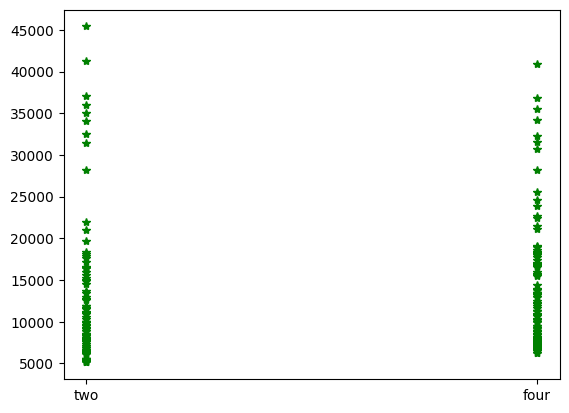

In [62]:
plt.plot(data["doornumber"], data["price"],"*", color = "green")

In [63]:
data["doornumber"] = pd.factorize(data["doornumber"])[0]

In [64]:
data.doornumber

0      0
1      0
2      0
3      1
4      1
      ..
200    1
201    1
202    1
203    1
204    1
Name: doornumber, Length: 205, dtype: int64

In [66]:
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,1,0,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,1,0,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,1,0,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,0,1,1,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,0,1,1,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [68]:
def factorize_d(str name):
    data[name] = pd.factorize(data[name])[0]

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

In [72]:
def factorize_d(column_name):
    data[column_name] = pd.factorize(data[column_name])[0]

In [83]:
factorize_d("enginetype")

In [77]:
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,1,0,0,0,0,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,1,0,0,0,0,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,1,0,1,0,0,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,0,1,1,2,1,0,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,0,1,1,2,2,0,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int64  
 2   aspiration        205 non-null    int64  
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    int64  
 5   drivewheel        205 non-null    int64  
 6   enginelocation    205 non-null    int64  
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [84]:
data.cylindernumber.value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

In [87]:
data.loc[data['cylindernumber'] == 'four', 'cylindernumber'] = 4
data.loc[data['cylindernumber'] == 'six', 'cylindernumber'] = 6
data.loc[data['cylindernumber'] == 'five', 'cylindernumber'] = 5
data.loc[data['cylindernumber'] == 'eight', 'cylindernumber'] = 8
data.loc[data['cylindernumber'] == 'two', 'cylindernumber'] = 2
data.loc[data['cylindernumber'] == 'three', 'cylindernumber'] = 3
data.loc[data['cylindernumber'] == 'twelve', 'cylindernumber'] =12

In [88]:
data.cylindernumber.value_counts()

cylindernumber
4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: count, dtype: int64

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int64  
 2   aspiration        205 non-null    int64  
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    int64  
 5   drivewheel        205 non-null    int64  
 6   enginelocation    205 non-null    int64  
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    int64  
 13  cylindernumber    205 non-null    int64  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    int64  
 16  boreratio         205 non-null    float64
 1

In [93]:
data["cylindernumber"] = data["cylindernumber"].astype(np.int64)

In [95]:
data.fuelsystem.value_counts()

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

In [96]:
factorize_d("fuelsystem")

In [97]:
data.fuelsystem.value_counts()

fuelsystem
0    94
1    66
6    20
3    11
7     9
5     3
2     1
4     1
Name: count, dtype: int64

In [99]:
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,0,0,0,0,88.6,168.8,64.1,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,0,0,0,0,0,88.6,168.8,64.1,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,0,0,1,0,0,94.5,171.2,65.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,0,0,1,2,1,0,99.8,176.6,66.2,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,0,0,1,2,2,0,99.4,176.6,66.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


In [100]:
from sklearn.model_selection import train_test_split

In [101]:
x = data.iloc[:,data.columns != "price"]

In [102]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int64  
 2   aspiration        205 non-null    int64  
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    int64  
 5   drivewheel        205 non-null    int64  
 6   enginelocation    205 non-null    int64  
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    int64  
 13  cylindernumber    205 non-null    int64  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    int64  
 16  boreratio         205 non-null    float64
 1

In [103]:
y = data.loc[:, data.columns == "price"]

In [105]:
y.head()

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


In [106]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.30, random_state= 43)

In [107]:
x_train.shape

(143, 23)

In [109]:
data.shape

(205, 24)

In [110]:
y_train.shape

(143, 1)

In [112]:
from sklearn.linear_model import LinearRegression

In [113]:
lr = LinearRegression()

In [114]:
lr.fit(x_train, y_train)

LinearRegression()

In [115]:
lr.coef_

array([[-3.18446387e+02, -6.09237880e+03,  3.49554075e+03,
        -6.53719735e+02, -4.18578136e+02, -6.92595806e+02,
         8.05368053e+03, -3.48344897e+02,  1.05313254e+02,
         8.30807337e+02,  3.17984348e+02,  3.01478037e+00,
         1.06470276e+03, -4.89794867e+03,  2.90692624e+02,
        -4.26325038e+02, -1.77893187e+04, -6.26651008e+03,
         5.97417406e+02,  3.76306645e+00,  1.96900224e+00,
        -8.52401858e+01,  1.08304895e+02]])

In [116]:
lr.intercept_

array([-3783.42605637])

In [117]:
pred_values = lr.predict(x_test)

In [118]:
from sklearn.metrics import mean_squared_error

In [119]:
cost = mean_squared_error(y_test, pred_values)

In [120]:
cost

20533201.403344683